# NumPy

This section offers a quick tour of the *NumPy* library for working with multi-dimensional arrays in *Python*.
*NumPy* library has evolved into an essential library for scientific computing in *Python* and has become a building block of many other scientific libraries, such as *SciPy*, *Scikit-learn*, *Pandas*, and others. 
What makes *NumPy* so particularly attractive to the scientific community is that it provides a convenient *Python* interface for working with multi-dimensional array data structures efficiently; the *NumPy* array data structure is also called `ndarray`, which is short for n-dimensional array.

In addition to being mostly implemented in *C* and using *Python* as a "glue language," the main reason why *NumPy* is so efficient for numerical computations is that *NumPy* arrays use contiguous blocks of memory that can be efficiently cached by the CPU. 
In contrast, *Python* lists are arrays of pointers to objects in random locations in memory, which cannot be easily cached and come with a more expensive memory look-up. 
However, the computational efficiency and low-memory footprint come at a cost: *NumPy* arrays have a fixed size and are homogeneous, which means that all elements must have the same type. 
Homogenous `ndarray` objects have the advantage that *NumPy* can carry out operations using efficient *C* loops and avoid expensive type checks and other overheads of the *Python API*. 
While adding and removing elements from the end of a *Python* list is very efficient, altering the size of a *NumPy* array is very expensive since it requires to create a new array and carry over the contents of the old array that we want to expand or shrink.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. NumPy is Fast!

Let us calculate the dot product between two vectors using regular *Python*, and then using *NumPy*:

$$ z = \vec{x}\vec{w} = \sum_i x_iw_i $$

In [2]:
def python_dot_product(x, w):
    z = 0
    for i in range(len(x)):
        z += x[i] * w[i]
    return z

def numpy_dot_product(x, w):
    return x.dot(w)
    
a = np.random.randint(low = 0, high = 20, size = 10_000)
b = np.random.randint(low = 0, high = 20, size = 10_000)

%timeit python_dot_product(a, b)
%timeit numpy_dot_product(a, b)
assert(python_dot_product(a, b) == numpy_dot_product(a, b))

8.84 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.7 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 2. N-dimensional Arrays

In [3]:
array2d = np.array([[1, 2, 3], [4, 5, 6]])

display(array2d, array2d.dtype)

array([[1, 2, 3],
       [4, 5, 6]])

dtype('int64')

In [4]:
array_int8 = array2d.astype(np.int8)
display(array_int8, array_int8.dtype)

array_float32 = array2d.astype(np.float32)
display(array_float32, array_float32.dtype)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int8)

dtype('int8')

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

dtype('float32')

In [5]:
print(f'Number of elements in ndarray: {array2d.size}')
print(f'Shape of the ndarray: {array2d.shape}')

Number of elements in ndarray: 6
Shape of the ndarray: (2, 3)


In [6]:
print(f'Shape of 1-darray: {np.array([1, 2, 3]).shape}')

Shape of 1-darray: (3,)


## 3. NumPy Array Construction and Indexing

In [7]:
np.ones(shape = (3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
np.empty(shape = (3, 4)) # initializes the 2d array with empty values

array([[2.00632233e-316, 0.00000000e+000, 5.28400063e+005,
        4.44388398e+252],
       [2.34840919e+251, 1.12038868e+219, 1.17365078e+214,
        9.08143507e+223],
       [7.49779493e+247, 2.46162802e-154, 4.72094421e+164,
        3.85034180e-315]])

In [9]:
np.eye(N = 3) # 1's in the main diagonal

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
np.diag(v = (3, 3, 3)) # sets values in the main diagonal

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

In [11]:
np.arange(start = 4., stop = 10.)

array([4., 5., 6., 7., 8., 9.])

In [12]:
np.arange(start = 4., stop = 10., step = 0.5)

array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [13]:
np.linspace(start = 0., stop = 1., num = 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Indexing

In [14]:
array = np.array([1, 2, 3, 4, 5])

display(array)
display(array[0], array[-1], array[[0, 2, 3]], array[:3], array[2:], array[1:-2])

array([1, 2, 3, 4, 5])

1

5

array([1, 3, 4])

array([1, 2, 3])

array([3, 4, 5])

array([2, 3])

In [15]:
array2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

display(array2d)
display(array2d[1:, 1:])
display(array2d[1:, :1])
display(array2d[0][0], array2d[-1][-1], array2d[:, 1], array2d[1, :])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[5, 6],
       [8, 9]])

array([[4],
       [7]])

1

9

array([2, 5, 8])

array([4, 5, 6])

## 4. Array Math and Universal Functions

In [16]:
array = np.array([[1, 2, 3], [4, 5, 6]])

display(array)
display(np.add(array, 1))
display(np.multiply(array, 2))
display(np.subtract(array, 1))
display(np.divide(array, 2))

array([[1, 2, 3],
       [4, 5, 6]])

array([[2, 3, 4],
       [5, 6, 7]])

array([[ 2,  4,  6],
       [ 8, 10, 12]])

array([[0, 1, 2],
       [3, 4, 5]])

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [17]:
array = np.array([[1, 2, 3], [4, 5, 6]])

display(array)
display(array + 1)
display(array * 2)
display(array - 1)
display(array / 2)

array([[1, 2, 3],
       [4, 5, 6]])

array([[2, 3, 4],
       [5, 6, 7]])

array([[ 2,  4,  6],
       [ 8, 10, 12]])

array([[0, 1, 2],
       [3, 4, 5]])

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [18]:
array = np.array([[1, 2, 3], [4, 5, 6]])

display(array)
display(np.sum(array), np.sum(array, axis = 0), np.sum(array, axis = 1))

array([[1, 2, 3],
       [4, 5, 6]])

21

array([5, 7, 9])

array([ 6, 15])

In [19]:
array = np.array([[1, 2, 3], [4, 5, 6]])

display(array)
display(np.sqrt(array), np.power(array, 2), np.log(array), np.log10(array))

array([[1, 2, 3],
       [4, 5, 6]])

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

array([[ 1,  4,  9],
       [16, 25, 36]])

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947]])

array([[0.        , 0.30103   , 0.47712125],
       [0.60205999, 0.69897   , 0.77815125]])

In [20]:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

display(array)
display(np.sum(array), np.mean(array), np.std(array), np.min(array), np.max(array), np.argmin(array), np.argmax(array))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

55

5.5

2.8722813232690143

1

10

0

9

## 5. Advanced Indexing - Memory Views and Copies

In the previous sections, we have used basic indexing and slicing routines. 
It is important to note that basic integer-based indexing and slicing create so-called views of *NumPy* arrays in memory. 
Working with views can be highly desirable since it avoids making unnecessary copies of arrays to save memory resources. 
To illustrate the concept of memory views, let us walk through a simple example where we access the first row in an array, assign it to a variable, and modify that variable:

In [21]:
array = np.array([[1, 2, 3], [4, 5, 6]])

first_row  = array[0]
first_row += 99

display(array, first_row)

array([[100, 101, 102],
       [  4,   5,   6]])

array([100, 101, 102])

As we can see in the example above, changing the value of `first_row` also affected the original array. 
The reason for this is that `array[0]` created a view of the first row in `array`, and its elements were then incremented by `99`. 
The same concept applies to slicing operations:

If we are working with *NumPy* arrays, it is always important to be aware that slicing creates views - sometimes it is desirable since it can speed up our code by avoiding to create unnecessary copies in memory. 
However, in certain scenarios we want force a copy of an array; we can do this via the copy method as shown below:

In [22]:
array = np.array([[1, 2, 3], [4, 5, 6]])

second_row  = array[1].copy()
second_row += 99

display(array, second_row)

array([[1, 2, 3],
       [4, 5, 6]])

array([103, 104, 105])

In addition to basic single-integer indexing and slicing operations, *NumPy* supports advanced indexing routines called *fancy indexing*. 
Via fancy indexing, we can use tuple or list objects of non-contiguous integer indices to return desired array elements. 
Since fancy indexing can be performed with non-contiguous sequences, it cannot return a view - a contiguous slice from memory. 
Thus, fancy indexing always returns a copy of an array - it is important to keep that in mind. 
The following code snippets show some fancy indexing examples:

In [23]:
array = np.array([[1, 2, 3], [4, 5, 6]])

display(array)
display(array[:, [0, 2]])

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 3],
       [4, 6]])

In [24]:
array = np.array([[1, 2, 3], [4, 5, 6]])
this_is_a_copy = array[:, [0, 2, 1]]

display(array)
display(this_is_a_copy)

this_is_a_copy = this_is_a_copy + 10

display(array)
display(this_is_a_copy)

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 3, 2],
       [4, 6, 5]])

array([[1, 2, 3],
       [4, 5, 6]])

array([[11, 13, 12],
       [14, 16, 15]])

Finally, we can also use Boolean masks for indexing - that is, arrays of `True` and `False` values. 
Consider the following example, where we return all values in the array that are greater than `3`:

In [25]:
array = np.array([[1, 2, 3], [4, 5, 6]])
greater3_mask = array > 3

display(array)
display(greater3_mask)
display(array[greater3_mask])

array([[1, 2, 3],
       [4, 5, 6]])

array([[False, False, False],
       [ True,  True,  True]])

array([4, 5, 6])

We can also chain different selection criteria using the logical and operator `&` or the logical or operator `|`.
The example below demonstrates how we can select array elements that are greater than `3` and divisible by `2`:

In [26]:
array = np.array([[1, 2, 3], [4, 5, 6]])

display(array[(array > 3) & (array % 2 == 0)])

array([4, 6])

Note that indexing using Boolean arrays is also considered "fancy indexing" and thus returns a copy of the array.

## 6. Random Number Generators

In [27]:
np.random.randint(low = 10, high = 20, size = 10)

array([19, 11, 13, 18, 19, 18, 18, 18, 12, 18])

In [28]:
rng = np.random.RandomState(100)

display(rng.randn(2, 2), rng.randint(low = 0, high = 10, size = 10))

array([[-1.74976547,  0.3426804 ],
       [ 1.1530358 , -0.25243604]])

array([4, 2, 5, 2, 2, 2, 1, 0, 8, 4])

## 7. Reshaping Arrays

In [29]:
array = np.array([1, 2, 3, 4, 5, 6])
array2d_view = array.reshape(2, 3)

display(array)
display(array2d_view)

array([1, 2, 3, 4, 5, 6])

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
array2d = np.array([[1, 2, 3], [4, 5, 6]])
array_flattened = array2d.reshape(-1)

display(array_flattened)

array([1, 2, 3, 4, 5, 6])

In [31]:
array_1 = np.array([1, 2, 3])
array_2 = np.array([4, 5, 6])

display(np.concatenate((array_1, array_2)))
display(np.vstack((array_1, array_2)))
display(np.hstack((array_1, array_2)))
display(np.hstack((array_1.reshape(-1, 1), array_2.reshape(-1, 1))))

array([1, 2, 3, 4, 5, 6])

array([[1, 2, 3],
       [4, 5, 6]])

array([1, 2, 3, 4, 5, 6])

array([[1, 4],
       [2, 5],
       [3, 6]])

## 8. Linear Algebra with NumPy Arrays

Intuitively, we can think of one-dimensional *NumPy* arrays as data structures that represent row vectors:

In [32]:
row_vector = np.array([1, 2, 3])

display(row_vector)

array([1, 2, 3])

Similarly, we can use two-dimensional arrays to create column vectors:

In [33]:
column_vector = np.array([[1, 2, 3]]).reshape(-1, 1)

display(column_vector)

array([[1],
       [2],
       [3]])

Instead of reshaping a one-dimensional array into a two-dimensional one, we can simply add a new axis as shown below:

In [34]:
row_vector[:, np.newaxis]

array([[1],
       [2],
       [3]])

These two approaches listed above, using `reshape(-1, 1)`, `np.newaxis`, yield the same results - all three approaches create views not copies of the row_vector array.

In [35]:
vector_view = row_vector[:, np.newaxis]
vector_view += 1

display(vector_view)

array([[2],
       [3],
       [4]])

In [36]:
column_vector = np.array([1, 2, 3]).reshape(-1, 1)
matrix = np.array([[1, 2, 3], [4, 5, 6]])

display(np.matmul(matrix, column_vector)) # matrix multiplicatin

array([[14],
       [32]])

In [37]:
row_vector = np.array([1, 2, 3])
column_vector = np.array([1, 2, 3]).reshape(-1, 1)

display(np.dot(row_vector, column_vector), row_vector@column_vector)

array([14])

array([14])

In [38]:
matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [39]:
transpose = matrix.T

display(matrix @ transpose) # another way to execute matrix multiplication

array([[14, 32],
       [32, 77]])

## 9. Matplotlib

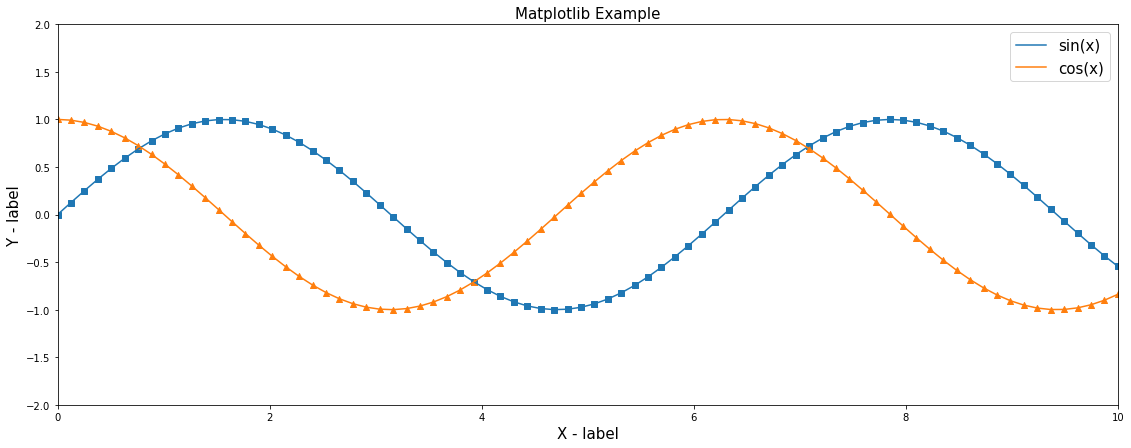

In [40]:
figure, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (19, 7))

x = np.linspace(start = 0, stop = 10, num = 80)

axes.plot(x, np.sin(x), label=('sin(x)'))
axes.scatter(x, np.sin(x), marker = 's')
axes.plot(x, np.cos(x), label=('cos(x)'))
axes.scatter(x, np.cos(x), marker = '^')

axes.set_xlim(left = 0, right = 10)
axes.set_ylim(bottom = -2, top = 2)

axes.set_xlabel('X - label', fontsize = 15)
axes.set_ylabel('Y - label', fontsize = 15)

axes.legend(fontsize = 15)
axes.set_title('Matplotlib Example', fontsize = 15)

plt.show()

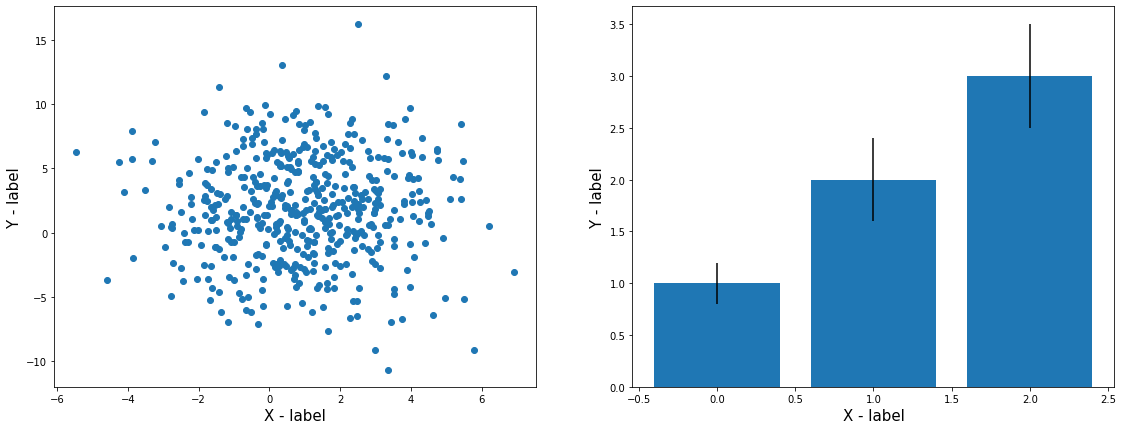

In [41]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (19, 7))

rng = np.random.RandomState(123)
x = rng.normal(loc = 1, scale = 2, size=500)
y = rng.normal(loc = 2, scale = 4, size=500)

axes[0].scatter(x, y)
axes[0].set_xlabel('X - label', fontsize = 15)
axes[0].set_ylabel('Y - label', fontsize = 15)

means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']


# plot bars
x_pos = list(range(len(bar_labels)))

axes[1].bar(x_pos, means, yerr = stddevs)
axes[1].set_xlabel('X - label', fontsize = 15)
axes[1].set_ylabel('Y - label', fontsize = 15)

plt.show()

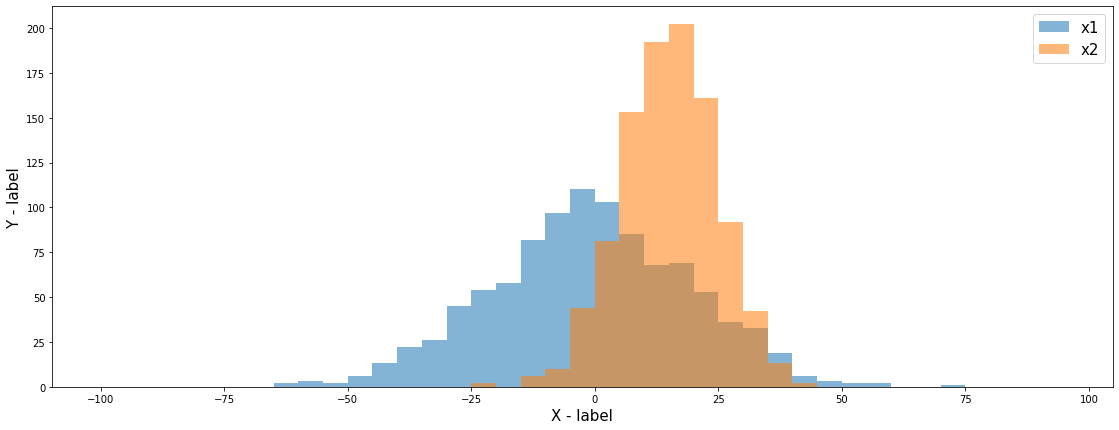

In [42]:
figure, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (19, 7))

rng = np.random.RandomState(123)
x1 = rng.normal(0, 20, 1000) 
x2 = rng.normal(15, 10, 1000)

bins = np.arange(-100, 100, 5) # fixed bin size

axes.hist(x1, bins=bins, alpha=0.55, label = 'x1')
axes.hist(x2, bins=bins, alpha=0.55, label = 'x2')

axes.set_xlabel('X - label', fontsize = 15)
axes.set_ylabel('Y - label', fontsize = 15)

axes.legend(fontsize = 15)

plt.show()